### Cartopy to plot earthquake simulation error maps

Here we demonstrate a possible use of cartopy to plot earthquake simulation error maps, potentially replacing the GMT workflow

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import cartopy.feature as cfeature
from matplotlib.transforms import offset_copy
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
plt.style.use('ggplot')

In [3]:
regionname='NCalifornia'

In [4]:
datafolder = "/Users/rmartinshort/Documents/Berkeley/MyShake_project/meetings/2019_04_11/for_meeting/%s/" %regionname      

In [5]:
all_events = pd.read_csv(datafolder+'%s_allevents.csv' %regionname,names=['lon','lat','depth','mag','time'])
detected_events = pd.read_csv(datafolder+"%s_single_event_tw:Y_opt:Y_bnds.csv" %regionname)
population = pd.read_csv(datafolder+'pop_running_myshake_%s_0.001.csv' %regionname,names=['lon','lat'])

In [6]:
all_events.head()

,lon,lat,depth,mag,time
0,-121.879833,37.036167,17.214,6.90,1989-10-18T00:04:15.190
1,-120.312000,36.231667,9.578,6.70,1983-05-02T23:42:38.060
2,-121.100500,35.700500,8.382,6.50,2003-12-22T19:15:56.240
3,-121.678833,37.309667,8.193,6.20,1984-04-24T21:15:18.760
4,-122.312333,38.215167,11.120,6.02,2014-08-24T10:20:44.070


In [7]:
detected_events.head()

,datetime,lat,lon,depth,mag,mu_mag,std_mag,mu_dist,std_dist,mu_originT,std_originT,mu_alertT,std_alertT,n_trig,total_opt_fails,nptrigs,nstrigs
0,['1989-10-18T00:04:15.190'],37.0362,-121.8798,17.214,6.90,0.133103,0.0,5.537750,0.0,1.691188,0.0,5.629,0.0,1,0.0,22.0,7.0
1,['1983-05-02T23:42:38.060'],36.2317,-120.3120,9.578,6.70,-0.362500,0.0,23.239631,0.0,-0.923957,0.0,14.746,0.0,1,0.0,9.0,53.0
2,['2003-12-22T19:15:56.240'],35.7005,-121.1005,8.382,6.50,-0.256000,0.0,16.476083,0.0,-7.000000,0.0,13.584,0.0,1,1.0,1.0,34.0
3,['1984-04-24T21:15:18.760'],37.3097,-121.6788,8.193,6.20,-0.346202,0.0,8.454863,0.0,0.856781,0.0,5.116,0.0,1,0.0,60.0,44.0
4,['2014-08-24T10:20:44.070'],38.2152,-122.3123,11.120,6.02,-0.301557,0.0,5.444523,0.0,0.502845,0.0,4.737,0.0,1,0.0,142.0,70.0


In [8]:
population.head()

,lon,lat
0,-123.629805,38.890586
1,-123.572247,38.824351
2,-123.107057,38.981823
3,-123.108712,38.977194
4,-123.049238,38.527906


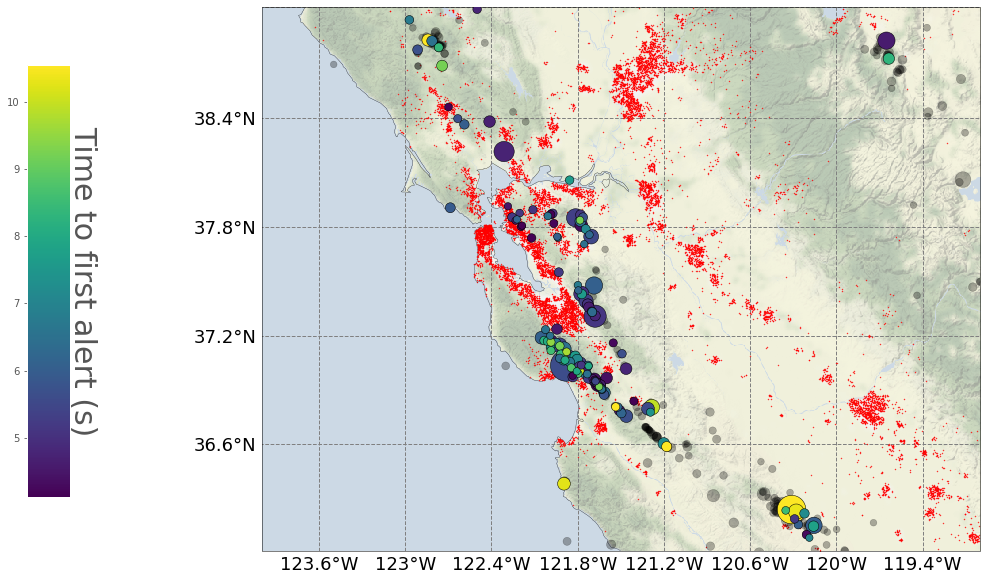

In [26]:
minlat_extent = 39
maxlat_extent = 36
minlon_extent = -124
maxlon_extent = -119

stamen_terrain = cimgt.Stamen('terrain-background')

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)
ax.set_extent([minlon_extent, maxlon_extent, \
               minlat_extent, maxlat_extent])

ax.coastlines(resolution='10m',linewidth=0.3)

# Add the Stamen data at zoom level 8.
ax.add_image(stamen_terrain, 8,alpha=0.5)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
            linewidth=1, color='gray', alpha=1, linestyle='--')


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 18, 'color': 'black'}
gl.ylabel_style = {'size': 18, 'color': 'black'}
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right= False 

#plot the population using phones
ax.plot(population['lon'],population['lat'],'r.',\
        transform=ccrs.PlateCarree(),markersize=0.8)

#plot the detected earthquakes

#Set lower and upper values for the colorscale
c_5 = np.percentile(detected_events['mu_alertT'],5)
c_95 = np.percentile(detected_events['mu_alertT'],95)

colorevents = detected_events['mu_alertT'].apply(lambda x: c_5 if x <= c_5 else x)
colorevents = colorevents.apply(lambda x: c_95 if x >= c_95 else x)

eqs = ax.scatter(detected_events['lon'],detected_events['lat'],\
        transform=ccrs.PlateCarree(),s=np.exp(detected_events['mag'])\
          ,edgecolor='k',zorder=10,c=colorevents,cmap='viridis')

#plot all earthquakes (to show undetected)
ax.scatter(all_events['lon'],all_events['lat'],\
        transform=ccrs.PlateCarree(),s=np.exp(0.95*all_events['mag'])\
          ,edgecolor='k',zorder=5,alpha=0.3,color='k')

bar_ax = fig.add_axes([0.1, 0.2, 0.03, 0.6])

cbar = plt.colorbar(eqs,cax=bar_ax)
bar_ax.yaxis.set_ticks_position('left')
bar_ax.yaxis.set_label_position('right')
cbar.set_label('Time to first alert (s)', rotation=270,fontsize=30,labelpad=27)


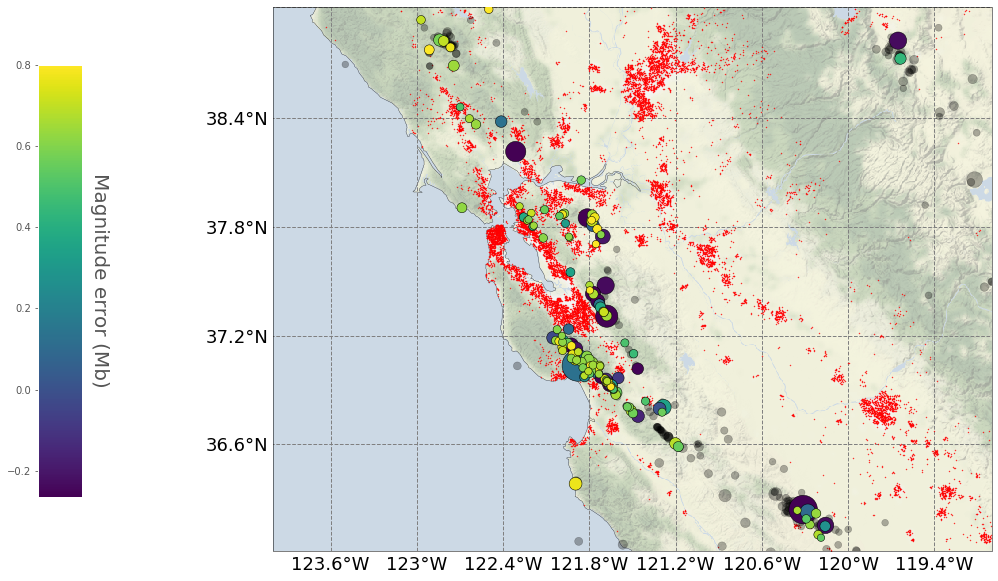

In [30]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)
ax.set_extent([minlon_extent, maxlon_extent, \
               minlat_extent, maxlat_extent])

ax.coastlines(resolution='10m',linewidth=0.3)

# Add the Stamen data at zoom level 8.
ax.add_image(stamen_terrain, 8,alpha=0.5)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
            linewidth=1, color='gray', alpha=1, linestyle='--')

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 18, 'color': 'black'}
gl.ylabel_style = {'size': 18, 'color': 'black'}
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right= False 

#plot the population using phones
ax.plot(population['lon'],population['lat'],'r.',\
        transform=ccrs.PlateCarree(),markersize=0.8)

#plot the detected earthquakes
#Set lower and upper values for the colorscale
c_5 = np.percentile(detected_events['mu_mag'],5)
c_95 = np.percentile(detected_events['mu_mag'],95)

colorevents = detected_events['mu_mag'].apply(lambda x: c_5 if x <= c_5 else x)
colorevents = colorevents.apply(lambda x: c_95 if x >= c_95 else x)

eqs = ax.scatter(detected_events['lon'],detected_events['lat'],\
        transform=ccrs.PlateCarree(),s=np.exp(detected_events['mag'])\
          ,edgecolor='k',zorder=10,c=colorevents,cmap='viridis')

#plot all earthquakes (to show undetected)
ax.scatter(all_events['lon'],all_events['lat'],\
        transform=ccrs.PlateCarree(),s=np.exp(0.95*all_events['mag'])\
          ,edgecolor='k',zorder=5,alpha=0.3,color='k')

bar_ax = fig.add_axes([0.1, 0.2, 0.03, 0.6])

#Set lower and upper values for the colorscale
#c_5 = np.percentile(detected_events['mu_mag'],1)
#c_95 = np.percentile(detected_events['mu_mag'],99)

cbar = plt.colorbar(eqs,cax=bar_ax)
bar_ax.yaxis.set_ticks_position('left')
bar_ax.yaxis.set_label_position('right')
cbar.set_label('Magnitude error (Mb)', rotation=270,fontsize=20,labelpad=27)

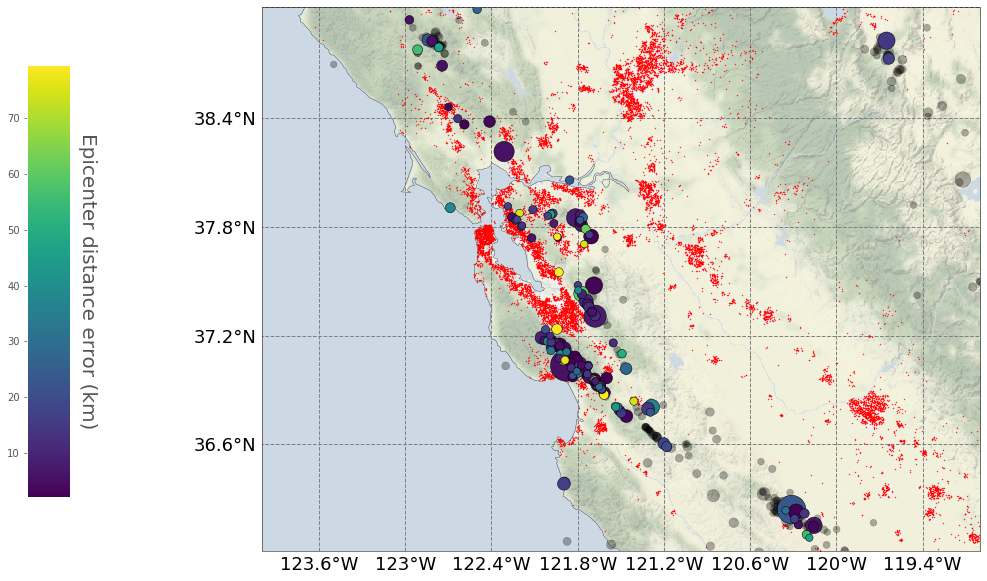

In [28]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)
ax.set_extent([minlon_extent, maxlon_extent, \
               minlat_extent, maxlat_extent])

ax.coastlines(resolution='10m',linewidth=0.3)

# Add the Stamen data at zoom level 8.
ax.add_image(stamen_terrain, 8,alpha=0.5)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
            linewidth=1, color='gray', alpha=1, linestyle='--')

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 18, 'color': 'black'}
gl.ylabel_style = {'size': 18, 'color': 'black'}
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right= False 

#plot the population using phones
ax.plot(population['lon'],population['lat'],'r.',\
        transform=ccrs.PlateCarree(),markersize=0.8)

#plot the detected earthquakes
#Set lower and upper values for the colorscale
c_5 = np.percentile(detected_events['mu_dist'],5)
c_95 = np.percentile(detected_events['mu_dist'],95)

colorevents = detected_events['mu_dist'].apply(lambda x: c_5 if x <= c_5 else x)
colorevents = colorevents.apply(lambda x: c_95 if x >= c_95 else x)

eqs = ax.scatter(detected_events['lon'],detected_events['lat'],\
        transform=ccrs.PlateCarree(),s=np.exp(detected_events['mag'])\
          ,edgecolor='k',zorder=10,c=colorevents,cmap='viridis')

#plot all earthquakes (to show undetected)
ax.scatter(all_events['lon'],all_events['lat'],\
        transform=ccrs.PlateCarree(),s=np.exp(0.95*all_events['mag'])\
          ,edgecolor='k',zorder=5,alpha=0.3,color='k')

bar_ax = fig.add_axes([0.1, 0.2, 0.03, 0.6])

cbar = plt.colorbar(eqs,cax=bar_ax)
bar_ax.yaxis.set_ticks_position('left')
bar_ax.yaxis.set_label_position('right')
cbar.set_label('Epicenter distance error (km)', rotation=270,fontsize=20,labelpad=27)